### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import glob 
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

### Importing the dataset

In [2]:
whr_data = pd.read_csv("whr_dataset_2015_2023/WHR_2023.csv", index_col =None)
whr_data.head(10)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,Western Europe,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,Western Europe,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,Western Europe,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,North America and ANZ,7.123,1.842,1.544,0.513,0.672,0.230,0.471


In [3]:
whr_data.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [4]:
whr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [5]:
len(whr_data)

137

In [6]:
whr_data.tail(5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,South Asia,1.859,0.645,0.000,0.087,0.000,0.093,0.059


In [7]:
whr_data.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


In [8]:
whr_data[whr_data.columns[2::]].corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.784342,0.834604,0.746699,0.662909,0.043680,0.471913
gdp_per_capita,0.784342,1.000000,0.737993,0.837518,0.451405,-0.156780,0.436979
social_support,0.834604,0.737993,1.000000,0.725334,0.541832,0.035736,0.272538
healthy_life_expectancy,0.746699,0.837518,0.725334,1.000000,0.414965,-0.135522,0.404417
freedom_to_make_life_choices,0.662909,0.451405,0.541832,0.414965,1.000000,0.169685,0.383672
generosity,0.043680,-0.156780,0.035736,-0.135522,0.169685,1.000000,0.121712
perceptions_of_corruption,0.471913,0.436979,0.272538,0.404417,0.383672,0.121712,1.000000


### Merging the dataset from 2015 to 2023 to increase the data size

In [9]:
# data pipeline for  merging dataset across the years from 2015 to 2023
all_whr_files = glob.glob("whr_dataset_2015_2023/*.csv")

whr_year_data = []
for file in all_whr_files:
    temp_df = pd.read_csv(file)
    temp_df['year'] = int(os.path.basename(file).split('_')[1].split('.')[0])
    whr_year_data.append(temp_df)

whr_merged_data = pd.concat(whr_year_data, ignore_index= False)

whr_merged_data = whr_merged_data.sort_values(by=['country','year']).reset_index(drop= True)

In [10]:
# first 10 rows of merged dataset 
whr_merged_data.head(10)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Afghanistan,South Asia,3.5750,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,2015
1,Afghanistan,South Asia,3.3600,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2016
2,Afghanistan,South Asia,3.7940,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2017
3,Afghanistan,South Asia,3.6320,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,2018
4,Afghanistan,South Asia,3.2030,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,2019
5,Afghanistan,South Asia,2.5669,0.300706,0.356434,0.266052,0.00000,0.135235,0.001226,2020
6,Afghanistan,South Asia,2.5230,0.370000,0.000000,0.126000,0.00000,0.122000,0.010000,2021
7,Afghanistan,South Asia,2.4040,0.758000,0.000000,0.289000,0.00000,0.089000,0.005000,2022
8,Afghanistan,South Asia,1.8590,0.645000,0.000000,0.087000,0.00000,0.093000,0.059000,2023
9,Albania,Central and Eastern Europe,4.9590,0.878670,0.804340,0.813250,0.35733,0.142720,0.064130,2015


### Analysis and Visualization

In [11]:
# checking for consistence in number of rows for each column 
whr_merged_data.count()

country                         1367
region                          1367
happiness_score                 1367
gdp_per_capita                  1367
social_support                  1367
healthy_life_expectancy         1366
freedom_to_make_life_choices    1367
generosity                      1367
perceptions_of_corruption       1366
year                            1367
dtype: int64

In [12]:
# viewing merged data statistics
whr_merged_data.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


In [13]:
# checking for duplicated rows after merging 
whr_merged_data.duplicated().sum()

0

In [14]:
# checking for missing values in columns 
whr_merged_data.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [15]:
whr_merged_data[whr_merged_data["healthy_life_expectancy"].isnull()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1149,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


In [16]:
# handling the missing value by replacing with the mean value for that year 2023
whr_merged_data['healthy_life_expectancy'] = whr_merged_data.groupby('year')['healthy_life_expectancy'].transform(lambda x: x.fillna(x.mean().round(3)))
whr_merged_data.loc[1149]

country                                   State of Palestine
region                          Middle East and North Africa
happiness_score                                        4.908
gdp_per_capita                                         1.144
social_support                                         1.309
healthy_life_expectancy                                0.366
freedom_to_make_life_choices                           0.416
generosity                                             0.065
perceptions_of_corruption                              0.067
year                                                    2023
Name: 1149, dtype: object

In [17]:
whr_merged_data[whr_merged_data["perceptions_of_corruption"].isnull()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1281,United Arab Emirates,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [18]:
# handling the missing value by replacing with the mean value for that year 2018
whr_merged_data['perceptions_of_corruption'] = whr_merged_data.groupby('year')['perceptions_of_corruption'].transform(lambda x: x.fillna(x.mean().round(3)))
whr_merged_data.loc[1281]

country                                 United Arab Emirates
region                          Middle East and North Africa
happiness_score                                        6.774
gdp_per_capita                                         2.096
social_support                                         0.776
healthy_life_expectancy                                 0.67
freedom_to_make_life_choices                           0.284
generosity                                             0.186
perceptions_of_corruption                              0.112
year                                                    2018
Name: 1281, dtype: object

In [19]:
# checking for missing values in columns 
whr_merged_data.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [20]:
# saving the cleaned data
whr_merged_data.to_csv("whr_cleaned_data", index = False)

In [21]:
# total number of countries 
len(whr_merged_data['country'].unique())

171

In [22]:
# total number of regions
len(whr_merged_data['region'].unique())

11

In [23]:
cols = whr_merged_data.columns
len(cols),cols

(10,
 Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
        'social_support', 'healthy_life_expectancy',
        'freedom_to_make_life_choices', 'generosity',
        'perceptions_of_corruption', 'year'],
       dtype='object'))

In [24]:
num_cols = cols[2::]
len(num_cols), num_cols

(8,
 Index(['happiness_score', 'gdp_per_capita', 'social_support',
        'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
        'perceptions_of_corruption', 'year'],
       dtype='object'))

In [25]:
cat_cols = cols[:2]
len(cat_cols), cat_cols

(2, Index(['country', 'region'], dtype='object'))

In [26]:
whr_merged_data[num_cols].corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
happiness_score,1.000000,0.723810,0.648155,0.682456,0.569458,0.082345,0.414692,0.061835
gdp_per_capita,0.723810,1.000000,0.522092,0.564595,0.439453,-0.153904,0.337090,0.327064
social_support,0.648155,0.522092,1.000000,0.560463,0.364927,-0.006385,0.147348,0.020381
healthy_life_expectancy,0.682456,0.564595,0.560463,1.000000,0.261438,0.026667,0.256426,-0.151110
freedom_to_make_life_choices,0.569458,0.439453,0.364927,0.261438,1.000000,0.157050,0.433673,0.288639
generosity,0.082345,-0.153904,-0.006385,0.026667,0.157050,1.000000,0.224353,-0.290562
perceptions_of_corruption,0.414692,0.337090,0.147348,0.256426,0.433673,0.224353,1.000000,0.036516
year,0.061835,0.327064,0.020381,-0.151110,0.288639,-0.290562,0.036516,1.000000


In [27]:
whr_merged_data[num_cols].corr(method='spearman')

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
happiness_score,1.000000,0.743567,0.637859,0.689177,0.567392,0.063991,0.298644,0.070048
gdp_per_capita,0.743567,1.000000,0.509962,0.566060,0.454579,-0.155472,0.243264,0.302889
social_support,0.637859,0.509962,1.000000,0.555559,0.359176,-0.010915,0.061597,0.026170
healthy_life_expectancy,0.689177,0.566060,0.555559,1.000000,0.258764,0.011862,0.152084,-0.169763
freedom_to_make_life_choices,0.567392,0.454579,0.359176,0.258764,1.000000,0.178039,0.394772,0.294853
generosity,0.063991,-0.155472,-0.010915,0.011862,0.178039,1.000000,0.187988,-0.279085
perceptions_of_corruption,0.298644,0.243264,0.061597,0.152084,0.394772,0.187988,1.000000,0.029486
year,0.070048,0.302889,0.026170,-0.169763,0.294853,-0.279085,0.029486,1.000000


In [28]:
whr_merged_data[num_cols].corr(method='kendall')

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
happiness_score,1.000000,0.542952,0.449763,0.489364,0.399362,0.040741,0.198896,0.049864
gdp_per_capita,0.542952,1.000000,0.347286,0.392243,0.312091,-0.110422,0.156142,0.214242
social_support,0.449763,0.347286,1.000000,0.388551,0.243933,-0.007420,0.038240,0.017241
healthy_life_expectancy,0.489364,0.392243,0.388551,1.000000,0.171904,0.005281,0.100379,-0.121556
freedom_to_make_life_choices,0.399362,0.312091,0.243933,0.171904,1.000000,0.116472,0.270720,0.210535
generosity,0.040741,-0.110422,-0.007420,0.005281,0.116472,1.000000,0.123608,-0.197154
perceptions_of_corruption,0.198896,0.156142,0.038240,0.100379,0.270720,0.123608,1.000000,0.020524
year,0.049864,0.214242,0.017241,-0.121556,0.210535,-0.197154,0.020524,1.000000


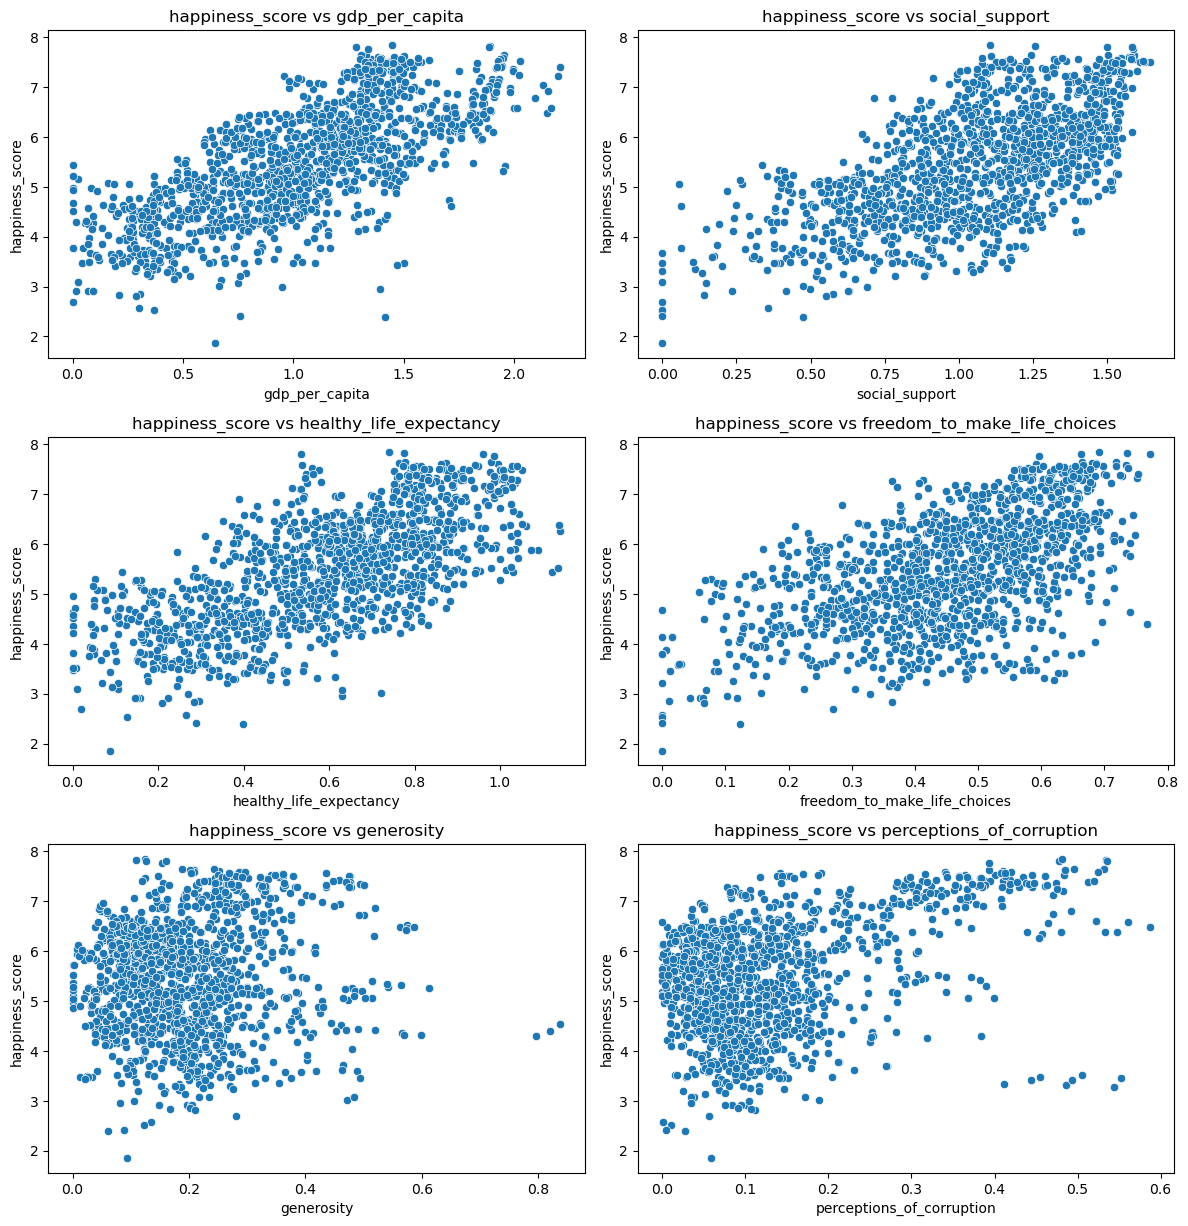

In [29]:
# from the pearson, spearman and kendall correlation analysis, we can conclude that
# the "generosity", "perceptions_of_corruption" and "year" columns have low linear
# correlation with our target column "happiness_score"

# plots to further support claim:
target_column = 'happiness_score'
n_cols = 2  # number of columns in the subplot grid
n_rows = (len(num_cols) + n_cols - 1) // n_cols  # compute number of rows


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))  # adjust figsize
axes = axes.flatten()  # flatten to 1D array for easy indexing

for i, column in enumerate(num_cols[1:-1]):
    sns.scatterplot(
        data=whr_merged_data, 
        x=column, 
        y=target_column, 
        ax=axes[i]  # plot on the specific subplot
    )
    axes[i].set_title(f'{target_column} vs {column}')

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

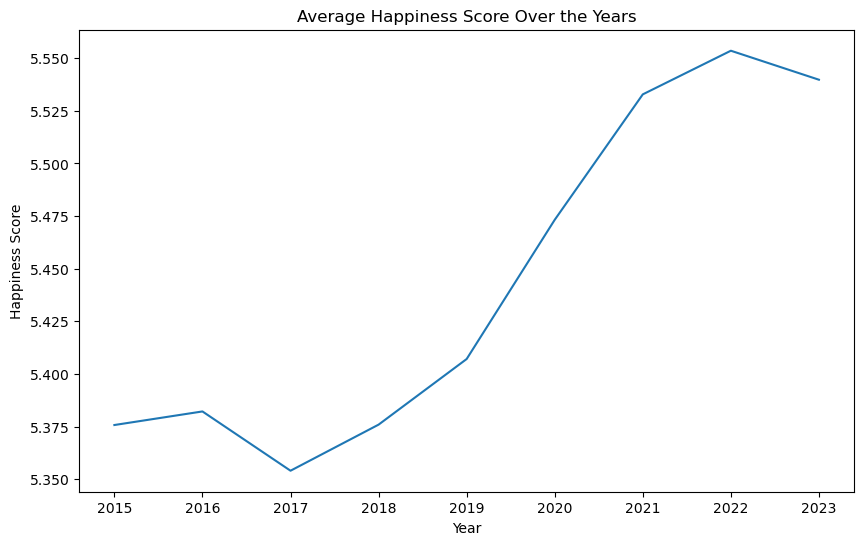

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=whr_merged_data, 
    x='year', 
    y='happiness_score', 
    estimator='mean',   # plots average Happiness Score per year
    errorbar=None             # removes confidence interval shading
)
plt.title('Average Happiness Score Over the Years')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.xticks(sorted(whr_merged_data['year'].unique()))  # ensures all years are shown
plt.show()

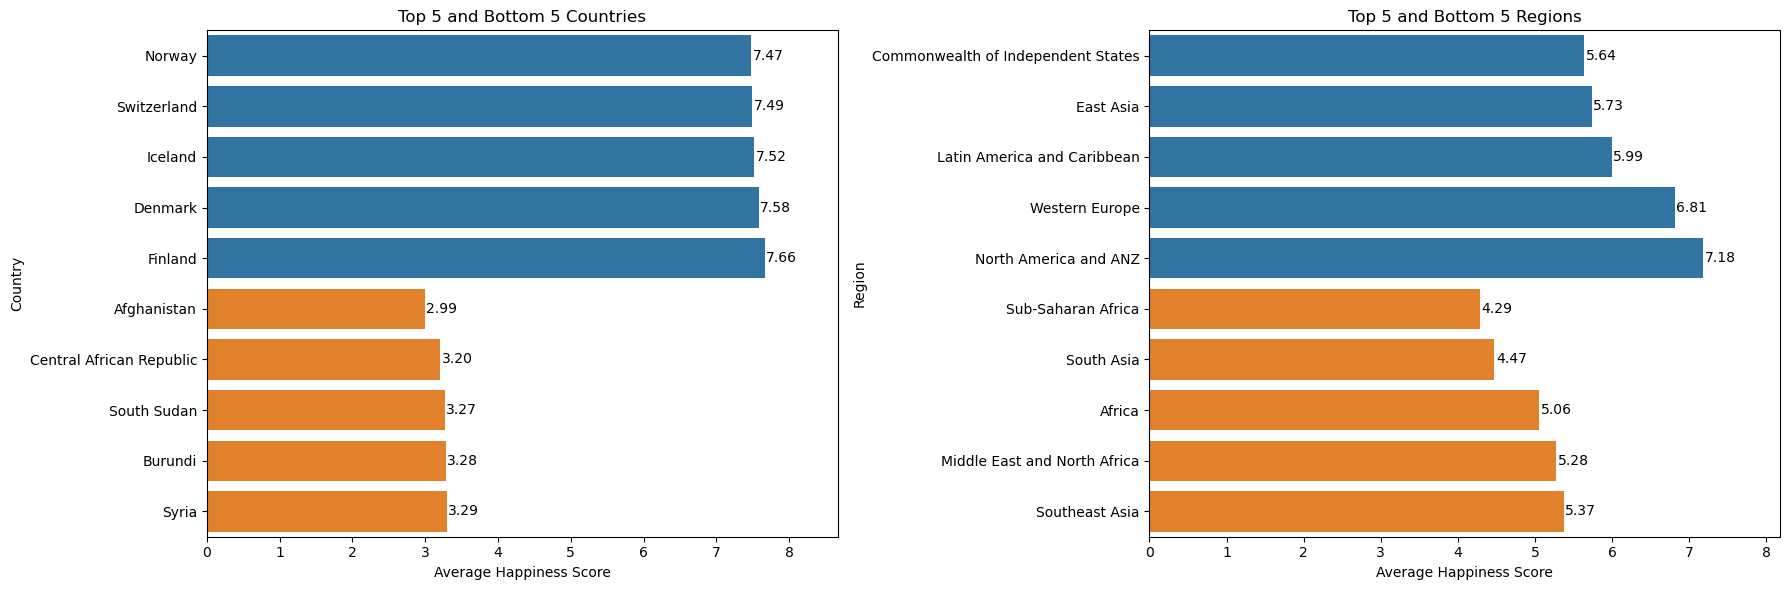

In [31]:
# --- Prepare Top/Bottom 5 Countries ---
country_avg = whr_merged_data.groupby('country')['happiness_score'].mean().sort_values()
top5_countries = country_avg.tail(5)
bottom5_countries = country_avg.head(5)
combined_countries = pd.concat([top5_countries, bottom5_countries]).reset_index()
combined_countries['color'] = ['green' if x in top5_countries.values else 'red' for x in combined_countries['happiness_score']]

# --- Prepare Top/Bottom 5 Regions ---
region_avg = whr_merged_data.groupby('region')['happiness_score'].mean().sort_values()
top5_regions = region_avg.tail(5)
bottom5_regions = region_avg.head(5)
combined_regions = pd.concat([top5_regions, bottom5_regions]).reset_index()
combined_regions['color'] = ['green' if x in top5_regions.values else 'red' for x in combined_regions['happiness_score']]

# --- Create Figure with 2 Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Plot Countries ---
ax = axes[0]
sns.barplot(
    data=combined_countries,
    x='happiness_score',
    y='country',
    hue='color',
    dodge=False,
    legend=False,
    ax=ax
)
# Annotate bar values
for i, row in combined_countries.iterrows():
    ax.text(row['happiness_score'] + 0.02, i, f"{row['happiness_score']:.2f}", va='center')
ax.set_title('Top 5 and Bottom 5 Countries')
ax.set_xlabel('Average Happiness Score')
ax.set_ylabel('Country')
ax.set_xlim(0, combined_countries['happiness_score'].max() + 1)

# --- Plot Regions ---
ax = axes[1]
sns.barplot(
    data=combined_regions,
    x='happiness_score',
    y='region',
    hue='color',
    dodge=False,
    legend=False,
    ax=ax
)
# Annotate bar values
for i, row in combined_regions.iterrows():
    ax.text(row['happiness_score'] + 0.02, i, f"{row['happiness_score']:.2f}", va='center')
ax.set_title('Top 5 and Bottom 5 Regions')
ax.set_xlabel('Average Happiness Score')
ax.set_ylabel('Region')
ax.set_xlim(0, combined_regions['happiness_score'].max() + 1)

plt.tight_layout()
plt.show()

### Data Spltting and Normalization

In [32]:
# splitting the data into feature and target variable

# dropping the unwanted columns due of lack of linear correlation
feat_cols = cols.drop(['happiness_score','generosity','perceptions_of_corruption'])

# splitting data using X and y as variable names 
X = whr_merged_data[feat_cols]
y = whr_merged_data['happiness_score']

print(X.shape, y.shape)

(1367, 7) (1367,)


In [33]:
X.head()

,country,region,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,year
0,Afghanistan,South Asia,0.319820,0.302850,0.303350,0.23414,2015
1,Afghanistan,South Asia,0.382270,0.110370,0.173440,0.16430,2016
2,Afghanistan,South Asia,0.401477,0.581543,0.180747,0.10618,2017
3,Afghanistan,South Asia,0.332000,0.537000,0.255000,0.08500,2018
4,Afghanistan,South Asia,0.350000,0.517000,0.361000,0.00000,2019


In [34]:
y.head()

0    3.575
1    3.360
2    3.794
3    3.632
4    3.203
Name: happiness_score, dtype: float64

In [35]:
# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['country', 'region'], drop_first=True, dtype = int)
X.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,year,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
0,0.319820,0.302850,0.303350,0.23414,2015,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.382270,0.110370,0.173440,0.16430,2016,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.401477,0.581543,0.180747,0.10618,2017,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.332000,0.537000,0.255000,0.08500,2018,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.350000,0.517000,0.361000,0.00000,2019,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
# now we split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 7, shuffle = True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(956, 185) (956,) (411, 185) (411,)


In [37]:
numeric_features = X_train.columns[:5]

In [38]:
# standardizing the data
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_train_scaled.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,year,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
132,-0.603189,0.316687,0.359510,0.792402,0.429835,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
744,0.492303,0.403902,1.025104,0.367946,0.034337,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
795,1.227812,0.397813,-0.739850,1.159835,1.616330,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,1.321706,0.193851,0.357718,0.668097,1.220832,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
306,1.820243,-0.393682,0.988921,-0.015227,1.220832,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
# scaling the test set as well with fitted train scale
X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])
X_test_scaled.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,year,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,...,region_Central and Eastern Europe,region_Commonwealth of Independent States,region_East Asia,region_Latin America and Caribbean,region_Middle East and North Africa,region_North America and ANZ,region_South Asia,region_Southeast Asia,region_Sub-Saharan Africa,region_Western Europe
263,-0.113542,-1.927965,-0.876543,-0.123792,1.220832,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1337,-0.631992,0.653755,0.989459,1.280123,0.429835,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
573,1.858248,0.994479,-0.056382,-0.079089,1.616330,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
533,0.221796,-0.597644,0.852227,-0.928454,0.034337,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13,-0.120249,-0.579379,1.210042,-0.430330,0.034337,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
with open("whr_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

### Model Training

In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100,n_jobs= -1, random_state=7),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=7)
}

In [42]:
results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "R2": r2
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df.sort_values("MSE", inplace=True)  # sort by best MSE
results_df

,Model,MSE,R2
0,Linear Regression,0.107093,0.913436
1,Ridge Regression,0.108946,0.911938
2,Random Forest,0.162152,0.868932
3,Gradient Boosting,0.177601,0.856445


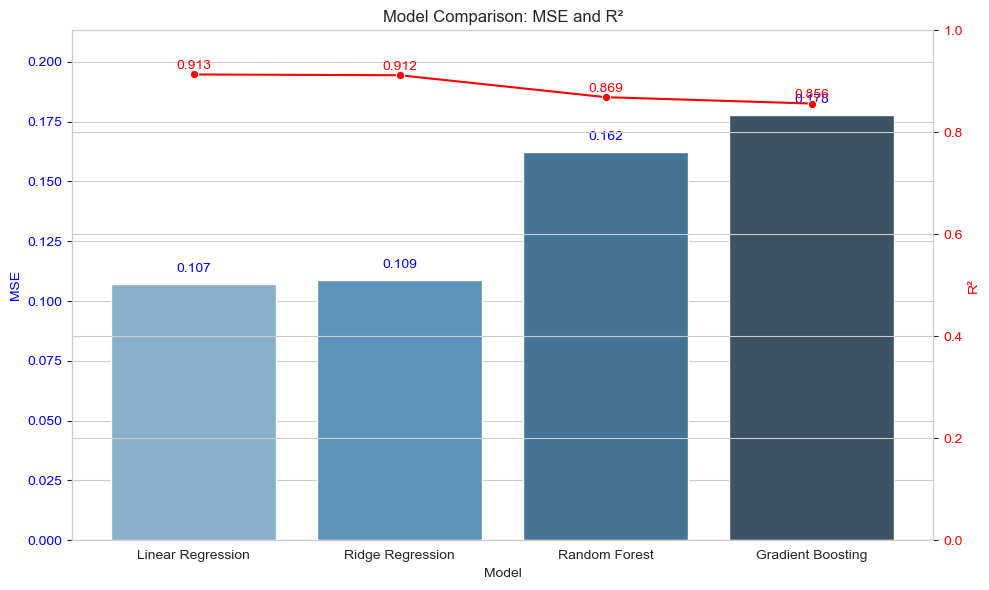

In [43]:
# Set style
sns.set_style("whitegrid")

# Create figure with 2 subplots
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for RMSE
sns.barplot(data=results_df, x="Model", y="MSE", palette="Blues_d",hue="Model",dodge=False,legend=False, ax=ax1)
ax1.set_ylabel("MSE", color="blue")
ax1.set_xlabel("Model")
ax1.set_title("Model Comparison: MSE and R²")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_ylim(0, max(results_df['MSE'])*1.2)

# Overlay R² as a line plot
ax2 = ax1.twinx()
sns.lineplot(data=results_df, x="Model", y="R2", marker="o", color="red", ax=ax2)
ax2.set_ylabel("R²", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(0, 1)

# Annotate values
for i, row in results_df.iterrows():
    ax1.text(i, row['MSE'] + 0.005, f"{row['MSE']:.3f}", ha='center', color='blue')
    ax2.text(i, row['R2'] + 0.01, f"{row['R2']:.3f}", ha='center', color='red')

plt.tight_layout()
plt.show()

### Saving the best model

In [44]:
best_model_name = results_df.iloc[0]['Model']
whr_best_model = models[best_model_name]

with open("whr_best_model.pkl", "wb") as f:
    pickle.dump(whr_best_model, f)

print(f"Best model saved: {best_model_name}")

Best model saved: Linear Regression


In [45]:
numeric_features = [
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'year'
]

# Use X_train.columns directly
all_features = X_train.columns.tolist()

# Extract countries and regions for dropdowns
country_names = [c.replace('country_', '') for c in all_features if c.startswith('country_')]
region_names = [r.replace('region_', '') for r in all_features if r.startswith('region_')]

model_columns = {
    'all_features': all_features,
    'numeric_features': numeric_features,
    'country_names': country_names,
    'region_names': region_names
}

In [46]:
with open("whr_model_columns.pkl", "wb") as f:
    pickle.dump(model_columns, f)